In [9]:
import numpy as np, healpy as hp, plottools as pl, local, tools_cmb, quad_func, warnings, curvedsky.norm_quad as csn
from matplotlib.pyplot import *
warnings.filterwarnings("ignore")

In [6]:
dirs = local.data_directory()
aobj = local.init_analysis_params(qid='boss_s15d',fltr='cinv',wind='base',ivar='base')
qobj = quad_func.reconstruction(dirs['local'],aobj.ids,stag=aobj.stag,rlmin=500,qlist=['TT'])

In [4]:
wn = tools_cmb.get_wfactors([aobj.qid],aobj.ascale,wind=aobj.wind,ivar=aobj.ivar,ptsr=aobj.ptsr,fltr=aobj.fltr)[aobj.qid]

wfactors: [0.0518618 0.0518618 0.0518618 0.0518618 0.0518618]


In [54]:
ep  = 1e-30
nl = 0.
Nl = 0.
for q in local.boss_d:
    bobj = local.init_analysis_params(qid=q,fltr='none',wind='com16',ivar='base')
    cobj = local.init_analysis_params(qid=q,fltr='none',wind='com16',ivar='noivar')
    nl += 1. / ( np.loadtxt(bobj.fscl['n'],unpack=True)[1] + ep )
    Nl += 1. / ( np.loadtxt(cobj.fscl['n'],unpack=True)[1] + ep )
nl = 1./(nl+ep)
Nl = 1./(Nl+ep)
# spectra
ctt = np.loadtxt(bobj.fscl['s'],unpack=True)[1]
cnl = aobj.lcl[0,:] + nl
CNl = aobj.lcl[0,:] + Nl
wcl = (np.loadtxt(aobj.fscl['c'])).T[1] # wiener-fileterd CMB aps
# corrected factors
ocl0, ifl = quad_func.cinv_empirical_fltr(aobj.lcl[0,:],wcl,cnl)
ocl1 = np.reshape( aobj.lcl[0,:]**2/(wcl+ep) ,(1,aobj.lmax+1) )

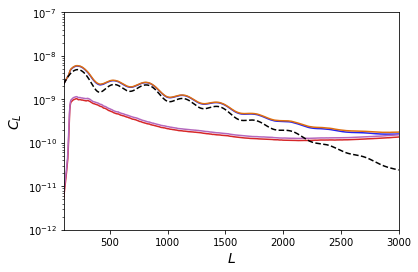

In [56]:
pl.plot_1dstyle(xmin=100,xmax=3000,ymin=1e-12,ymax=1e-7,ylog=True)
plot(cnl*aobj.l**2)
plot(CNl*aobj.l**2)
plot(ctt*aobj.l**2)
plot(nl*aobj.l**2)
plot(Nl*aobj.l**2)
plot(aobj.lcl[0,:]*aobj.l**2,color='k',ls='--')

In [19]:
al0 = csn.qtt('lens',2048,500,3000,aobj.lcl[0,:3001],ocl0[0,:3001],lfac='k')[0]

In [20]:
al1 = csn.qtt('lens',2048,500,3000,aobj.lcl[0,:3001],ocl1[0,:3001],lfac='k')[0]

In [57]:
al2 = csn.qtt('lens',2048,500,3000,aobj.lcl[0,:3001],cnl[:3001],lfac='k')[0]
al3 = csn.qtt('lens',2048,500,3000,aobj.lcl[0,:3001],CNl[:3001],lfac='k')[0]

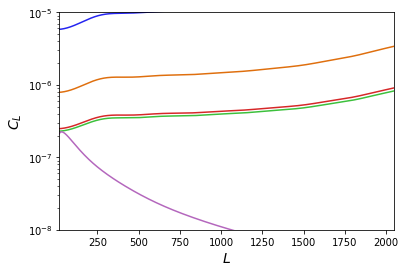

In [58]:
pl.plot_1dstyle(ymin=1e-8,ymax=1e-5,ylog=True)
plot(al0)
plot(al1)
plot(al2)
plot(al3)
plot(aobj.ckk)